# 3D model

This code illustrates how to create a model formed by rectangular prisms.

### Things we have to import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import vedo

In [3]:
# set the backend for vedo
vedo.settings.default_backend= 'vtk'
#vedo.settings.default_backend= '2d'

In [4]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [5]:
# Python package noise (https://github.com/caseman/noise) for generating Perlin noise.
# Such noise is usefull to simulate topography.
import noise

In [6]:
from gravmag import data_structures

### Set the area and number of points along the horizontal directions

In [7]:
# number of points along the x and y directions
shape = (40, 50)

# minimum x, maximum x, minimum y and maximum y
area = [-5100, 4900, -3800, 6200]

In [8]:
dx, dy = data_structures.grid_xy_spacing(area=area, shape=shape)
print('dx = {:.3f} m | dx = {:.3f} m'.format(dx, dy))

dx = 256.410 m | dx = 204.082 m


In [9]:
grid = data_structures.grid_xy(area=area, shape=shape, z0=0)

### Define the thickness of all rectangular cells covering the simulated area

In [10]:
# Generate a synthetic random surfaces with the Python package [`noise`](https://pypi.org/project/noise/),
# by following the example presented at [Jack McKew's Blog](https://jackmckew.dev/3d-terrain-in-python.html)

# parameters controlling the surface
amplitude = 500.
vertical_center = 250.

# generate the surface
thickness = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        thickness[i][j] = noise.pnoise2(
            i/40, 
            j/30, 
            octaves=29, 
            persistence=0.4,
            lacunarity=3, 
            repeatx=10, 
            repeaty=4, 
            base=0
        )
thickness = (
    amplitude*(
        (thickness - np.min(thickness))/(np.max(thickness) - np.min(thickness))
    )
)

# horizontal boundaries of the prisms
X, Y = data_structures.grid_xy_to_full_matrices_view(
    x = np.linspace(
        area[0] + 0.5*dx, 
        area[1] - 0.5*dx, 
        shape[0]
    ),
    y = np.linspace(
        area[2] + 0.5*dy, 
        area[3] - 0.5*dy, 
        shape[1]
    ),
    shape = shape
)

In [11]:
thickness.shape

(40, 50)

### Plot the model

In [12]:
grid_full_flatten = data_structures.grid_xy_to_full_flatten(grid=grid, ordering='xy')

In [13]:
points = vedo.Points(
    np.vstack([grid_full_flatten['x'], grid_full_flatten['y'], thickness.T.ravel()]).T,
    r=3,
    c='k',
    alpha=1
).force_opaque()


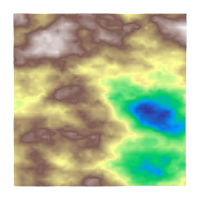

In [14]:
# build a surface from points
surface = points.generate_delaunay2d()

# colorize the surface using the vertical coordinate z
surface.cmap(input_cmap='terrain', input_array=surface.vertices[:,2], vmin=np.min(thickness), vmax=np.max(thickness))

# add a colorbar to the surface
surface.add_scalarbar(
    title='z (m)', 
    pos=(0.05,0.15),
    title_yoffset=15,
    font_size=14,
    size=(60, 1000000),
    nlabels=5,
    horizontal=True,
    label_format=':6.0f'
)

In [15]:
prisms = []
prisms.append(vedo.Box(
    pos=(-2000, 0, 0, 2000, -100, 500), 
    # length=1.0,
    # width=2.0,
    # height=3.0,
    #size=(),
    c='blue4',
    alpha=1
))

prisms.append(vedo.Box(
    pos=(-4000, 3000, 3600, 4000, 100, 800), 
    # length=1.0,
    # width=2.0,
    # height=3.0,
    #size=(),
    c='red4',
    alpha=1
))

prisms = vedo.merge(prisms).force_opaque()
#prisms = vedo.Assembly(prisms)
#prisms = vedo.Volume(prisms)


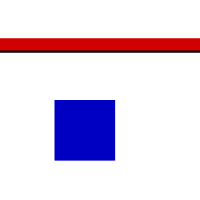

In [16]:
# create colors for the prisms
# the color values must be defined for the faces of each prisms
# we need to repeat the color values for each prisms 6 times because they are
# associated to the prisms faces
prisms_colors = np.repeat(a=[-10, 10], repeats=6)

# colorize the prisms
prisms.cmap(input_cmap='seismic', input_array=prisms_colors, on='cells', vmin=-15, vmax=15)

# add a colorbar to the prisms
prisms.add_scalarbar(
    title='density (kg/m³)', 
    pos=(0.05,0.05),
    title_yoffset=15,
    font_size=14,
    #size=(60, 1000000000),
    nlabels=5,
    horizontal=True,
    label_format=':6.0f'
)

In [19]:
custom_axes = vedo.Axes(
    obj=None,
    xtitle='x',
    ytitle='y',
    ztitle='z',
    xrange=(area[0], area[1]),
    yrange=(area[2], area[3]),
    zrange=(-200, 1000),
    c=None,
    number_of_divisions=None,
    digits=None,
    limit_ratio=0.04,
    title_depth=0,
    title_font='',
    text_scale=1.0,
    x_values_and_labels=None,
    y_values_and_labels=None,
    z_values_and_labels=None,
    htitle='',
    htitle_size=0.03,
    htitle_font=None,
    htitle_italic=False,
    htitle_color=None,
    htitle_backface_color=None,
    htitle_justify='bottom-left',
    htitle_rotation=90,
    htitle_offset=(0, 0.01, 0),
    xtitle_position=0.95,
    ytitle_position=0.95,
    ztitle_position=0.95,
    xtitle_offset=0.025,
    ytitle_offset=-0.0875,
    ztitle_offset=0.02,
    xtitle_justify=None,
    ytitle_justify=None,
    ztitle_justify=None,
    xtitle_rotation=(180,0,180),
    ytitle_rotation=(90, 0, 180),
    ztitle_rotation=(0, 0, 180),
    xtitle_box=False,
    ytitle_box=False,
    xtitle_size=0.025,
    ytitle_size=0.025,
    ztitle_size=0.025,
    xtitle_color='k',
    ytitle_color='k',
    ztitle_color='k',
    xtitle_backface_color='k',
    ytitle_backface_color='k',
    ztitle_backface_color='k',
    xtitle_italic=0,
    ytitle_italic=0,
    ztitle_italic=0,
    grid_linewidth=1,
    xygrid=False,
    yzgrid=False,
    zxgrid=True,
    xygrid2=True,
    yzgrid2=True,
    zxgrid2=False,
    xygrid_transparent=True,
    yzgrid_transparent=False,
    zxgrid_transparent=True,
    xygrid2_transparent=False,
    yzgrid2_transparent=True,
    zxgrid2_transparent=False,
    xyplane_color=None,
    yzplane_color=None,
    zxplane_color=None,
    xygrid_color=None,
    yzgrid_color=None,
    zxgrid_color=None,
    xyalpha=0.075,
    yzalpha=0.075,
    zxalpha=0.075,
    xyframe_line=None,
    yzframe_line=None,
    zxframe_line=None,
    xyframe_color=None,
    yzframe_color=None,
    zxframe_color=None,
    axes_linewidth=1,
    xline_color=None,
    yline_color=None,
    zline_color=None,
    xhighlight_zero=False,
    yhighlight_zero=False,
    zhighlight_zero=False,
    xhighlight_zero_color='red4',
    yhighlight_zero_color='green4',
    zhighlight_zero_color='blue4',
    show_ticks=True,
    xtick_length=0.015,
    ytick_length=0.015,
    ztick_length=0.015,
    xtick_thickness=0.0025,
    ytick_thickness=0.0025,
    ztick_thickness=0.0025,
    xminor_ticks=1,
    yminor_ticks=1,
    zminor_ticks=None,
    tip_size=None,
    label_font='',
    xlabel_color='k',
    ylabel_color='k',
    zlabel_color='k',
    xlabel_backface_color='k',
    ylabel_backface_color='k',
    zlabel_backface_color='k',
    xlabel_size=0.016,
    ylabel_size=0.016,
    zlabel_size=0.016,
    xlabel_offset=0.8,
    ylabel_offset=-1,
    zlabel_offset=0.8,
    xlabel_justify=None,
    ylabel_justify=None,
    zlabel_justify=None,
    xlabel_rotation=(180,0,180),
    ylabel_rotation=(90, 0, 180),
    zlabel_rotation=0,
    xaxis_rotation=0,
    yaxis_rotation=0,
    zaxis_rotation=0,
    xyshift=0,
    yzshift=0,
    zxshift=0,
    xshift_along_y=0,
    xshift_along_z=0,
    yshift_along_x=1,
    yshift_along_z=0,
    zshift_along_x=0,
    zshift_along_y=0,
    x_use_bounds=False,
    y_use_bounds=False,
    z_use_bounds=False,
    x_inverted=False,
    y_inverted=False,
    z_inverted=False,
    use_global=False,
    tol=0.001
)

In [21]:
pl = vedo.Plotter()

pl += points

pl += surface

pl += prisms

pl += custom_axes

pl.show(
    axes=0, zoom=1, viewup=(0,0,-1), elevation=0, roll=0, azimuth=0
).close()